# Import Libraries

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Dataset

In [3]:
# Loading the dataset
dataset = pd.read_csv('/content/gdrive/My Drive/IYKRA/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
X = dataset.iloc[:, [3, 4]].values

# Hierarchical Clustering

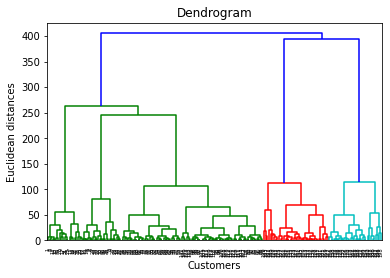

In [6]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

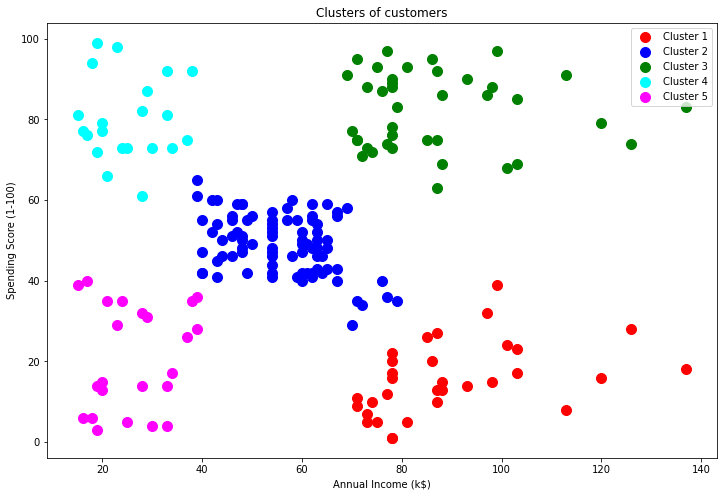

In [9]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# DBSCAN

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=3)
y_dbscan = dbscan.fit_predict(X)

In [18]:
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

# HDBSCAN

In [20]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311889 sha256=15c2554f627238a5eb57312a6c1b7995ec977933658560a5e7a233be8f883774
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [27]:
from hdbscan import HDBSCAN
hdb = HDBSCAN()
hdb.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [28]:
hdb.labels_

array([-1,  3,  1,  3, -1,  3,  1, -1,  1,  3,  1, -1,  1,  3,  1,  3,  4,
       -1, -1, -1,  4,  3,  1,  3,  1,  3, -1, -1,  4, -1,  1,  3, -1, -1,
        1,  3, -1,  3, -1, -1,  4, -1,  4,  4, -1,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  0, -1,  0,  4,  0,  2,  0,  2,  0,  4,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

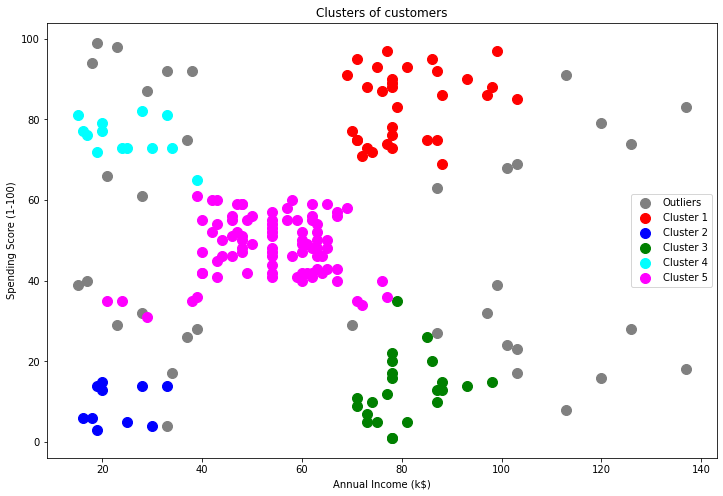

In [29]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[hdb.labels_ == -1, 0], X[hdb.labels_ == -1, 1], s = 100, c = 'grey', label = 'Outliers')
plt.scatter(X[hdb.labels_ == 0, 0], X[hdb.labels_ == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[hdb.labels_ == 1, 0], X[hdb.labels_ == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[hdb.labels_ == 2, 0], X[hdb.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[hdb.labels_ == 3, 0], X[hdb.labels_ == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[hdb.labels_ == 4, 0], X[hdb.labels_ == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Isolation Forest

In [31]:
from sklearn.ensemble import IsolationForest

In [61]:
clf = IsolationForest(random_state=0)
clf.fit(X)
y_if = clf.predict(X)

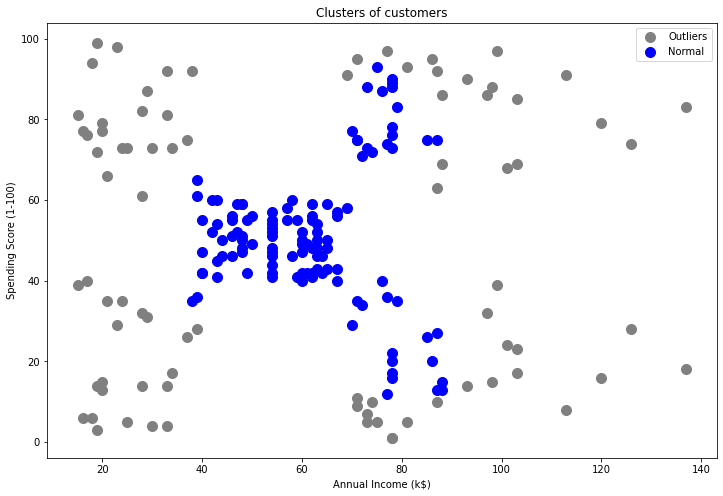

In [62]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_if == -1, 0], X[y_if == -1, 1], s = 100, c = 'grey', label = 'Outliers')
plt.scatter(X[y_if == 1, 0], X[y_if == 1, 1], s = 100, c = 'blue', label = 'Normal')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Evaluation Metrics

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_hc)

0.5529945955148897

In [43]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_if)

25.3544043190376

In [45]:
!pip install validclust

In [49]:
from validclust import dunn
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X)

In [50]:
dunn(dist, y_hc)

0.0888396953370327

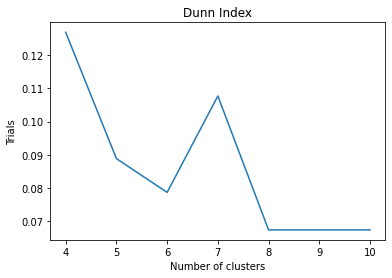

In [55]:
sets = []
for i in range(4, 11):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    dist = pairwise_distances(X)
    val = dunn(dist, y_hc)
    sets.append(val)
plt.plot(range(4, 11), sets)
plt.title('Dunn Index')
plt.xlabel('Number of clusters')
plt.ylabel('Trials')
plt.show()

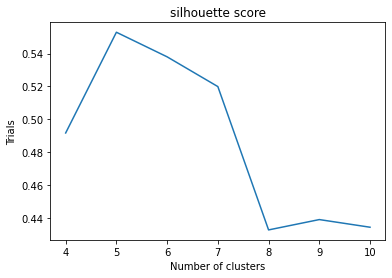

In [58]:
sets = []
for i in range(4, 11):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    val = silhouette_score(X, y_hc)
    sets.append(val)
plt.plot(range(4, 11), sets)
plt.title('silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Trials')
plt.show()